In [33]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from model import BuildingSimulation as bs, BuildingGraph as bg
from model.utils import *
import matplotlib.colors as mcolors
from model.WallSimulation import convectionDOE2
from runMyBuildingMC import cleanMaterial, getConstructions
from model.WallSimulation import processMaterials


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## DOE-2 Convection

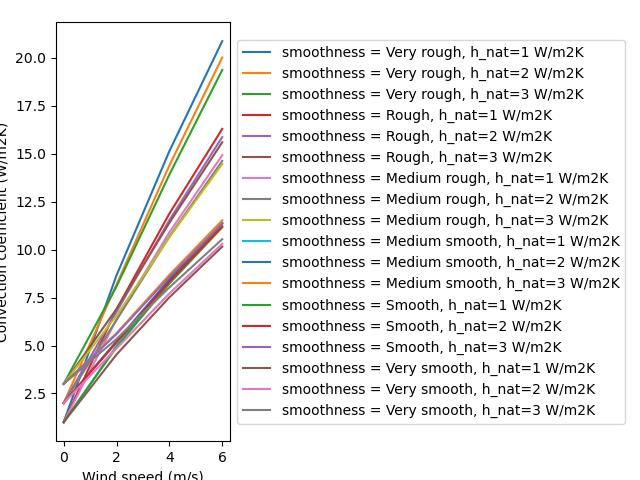

In [34]:
R_f = pd.Series({
    "Very rough": 2.17,
    "Rough": 1.67,
    "Medium rough": 1.52,
    "Medium smooth": 1.13,
    "Smooth": 1.11,
    "Very smooth": 1.00,
})

V = [0, 2, 4, 6]
h_nat = [1, 2, 3]
plt.figure()
for smoothness, r_f in R_f.items():
    for h in h_nat:
        plt.plot(V, convectionDOE2(h, V, r_f), label=f"smoothness = {smoothness}, h_nat={h} W/m2K")
#specify legend outside of plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#make plot tight
plt.tight_layout()
xlabel = plt.xlabel("Wind speed (m/s)")
ylabel = plt.ylabel("Convection coefficient (W/m2K)")


# Checking Constructions

In [48]:
for materialType in ["Light", "Medium", "Heavy"]:
    materials = getConstructions(materialType)
    wallMaterial, _, _, _ = processMaterials(materials["wall"])
    partitionMaterial, _, _, _ = processMaterials(materials["partition"])
    roofMaterial, _, _, _ = processMaterials(materials["roof"])
    floorMaterial, _, _, _ = processMaterials(materials["floor"])

    display(f"{materialType} materials")
    display(wallMaterial)
    display(f"total wall R-value: {wallMaterial['Thermal_Resistance'].sum()}")
    display(partitionMaterial)
    display(f"total partition R-value: {partitionMaterial['Thermal_Resistance'].sum()}")
    display(roofMaterial)
    display(f"total roof R-value: {roofMaterial['Thermal_Resistance'].sum()}")
    display(floorMaterial)
    display(f"total floor R-value (no soil): {floorMaterial['Thermal_Resistance'].iloc[:-1].sum()}")

'Light materials'

,key,Roughness,Thickness,Conductivity,Density,Specific_Heat,Thermal_Resistance,depth
G01a 19mm gypsum board,Material,MediumSmooth,0.01900,0.160000,800.0,1090.0,0.118750,0.01900
F04 Wall air space resistance,Material:AirGap,NaN,0.00698,0.046533,12.0,1005.0,0.150000,0.02598
I02 50mm insulation board,Material,MediumRough,0.05080,0.030000,43.0,1210.0,1.693333,0.07678


'total wall R-value: 1.9620833333333334'

,key,Roughness,Thickness,Conductivity,Density,Specific_Heat,Thermal_Resistance,depth
G01a 19mm gypsum board,Material,MediumSmooth,0.0190,0.160000,800.0,1090.0,0.11875,0.0190
F04 Wall air space resistance,Material:AirGap,NaN,0.0038,0.025333,12.0,1005.0,0.15000,0.0228
G01a 19mm gypsum board,Material,MediumSmooth,0.0190,0.160000,800.0,1090.0,0.11875,0.0418


'total partition R-value: 0.38749999999999996'

,key,Roughness,Thickness,Conductivity,Density,Specific_Heat,Thermal_Resistance,depth
F16 Acoustic tile,Material,MediumSmooth,0.01910,0.060000,368.0,590.0,0.318333,0.01910
F05 Ceiling air space resistance,Material:AirGap,NaN,0.01207,0.067056,12.0,1005.0,0.180000,0.03117
M11 100mm lightweight concrete,Material,MediumRough,0.10160,0.530000,1280.0,840.0,0.191698,0.13277


'total roof R-value: 0.6900314465408804'

,key,Roughness,Thickness,Conductivity,Density,Specific_Heat,Thermal_Resistance,depth
F16 Acoustic tile,Material,MediumSmooth,0.01910,0.060000,368.0,590.0,0.318333,0.01910
F05 Ceiling air space resistance,Material:AirGap,NaN,0.06207,0.344833,12.0,1005.0,0.180000,0.08117
M11 100mm lightweight concrete,Material,MediumRough,0.10160,0.530000,1280.0,840.0,0.191698,0.18277
Soil,Material,NaN,0.50000,1.500000,2800.0,850.0,0.333333,0.68277


'total floor R-value (no soil): 0.6900314465408804'

'Medium materials'

,key,Roughness,Thickness,Conductivity,Density,Specific_Heat,Thermal_Resistance,depth
G01a 19mm gypsum board,Material,MediumSmooth,0.01900,0.160000,800.0,1090.0,0.118750,0.01900
F04 Wall air space resistance,Material:AirGap,NaN,0.01714,0.114267,12.0,1005.0,0.150000,0.03614
I02 50mm insulation board,Material,MediumRough,0.05080,0.030000,43.0,1210.0,1.693333,0.08694
M01 100mm brick,Material,MediumRough,0.10160,0.890000,1920.0,790.0,0.114157,0.18854


'total wall R-value: 2.07624063670412'

,key,Roughness,Thickness,Conductivity,Density,Specific_Heat,Thermal_Resistance,depth
G01a 19mm gypsum board,Material,MediumSmooth,0.0190,0.160000,800.0,1090.0,0.11875,0.0190
F04 Wall air space resistance,Material:AirGap,NaN,0.0038,0.025333,12.0,1005.0,0.15000,0.0228
G01a 19mm gypsum board,Material,MediumSmooth,0.0190,0.160000,800.0,1090.0,0.11875,0.0418


'total partition R-value: 0.38749999999999996'

,key,Roughness,Thickness,Conductivity,Density,Specific_Heat,Thermal_Resistance,depth
F16 Acoustic tile,Material,MediumSmooth,0.01910,0.060000,368.0,590.0,0.318333,0.01910
F05 Ceiling air space resistance,Material:AirGap,NaN,0.01207,0.067056,12.0,1005.0,0.180000,0.03117
M14a 100mm heavyweight concrete,Material,MediumRough,0.10160,1.950000,2240.0,900.0,0.052103,0.13277


'total roof R-value: 0.5504358974358974'

,key,Roughness,Thickness,Conductivity,Density,Specific_Heat,Thermal_Resistance,depth
F16 Acoustic tile,Material,MediumSmooth,0.01910,0.060000,368.0,590.0,0.318333,0.01910
F05 Ceiling air space resistance,Material:AirGap,NaN,0.06207,0.344833,12.0,1005.0,0.180000,0.08117
M14a 100mm heavyweight concrete,Material,MediumRough,0.10160,1.950000,2240.0,900.0,0.052103,0.18277
Soil,Material,NaN,0.50000,1.500000,2800.0,850.0,0.333333,0.68277


'total floor R-value (no soil): 0.5504358974358974'

'Heavy materials'

,key,Roughness,Thickness,Conductivity,Density,Specific_Heat,Thermal_Resistance,depth
G01a 19mm gypsum board,Material,MediumSmooth,0.01900,0.160000,800.0,1090.0,0.118750,0.01900
F04 Wall air space resistance,Material:AirGap,NaN,0.03746,0.249733,12.0,1005.0,0.150000,0.05646
I02 50mm insulation board,Material,MediumRough,0.05080,0.030000,43.0,1210.0,1.693333,0.10726
M15 200mm heavyweight concrete,Material,MediumRough,0.20320,1.950000,2240.0,900.0,0.104205,0.31046
M01 100mm brick,Material,MediumRough,0.10160,0.890000,1920.0,790.0,0.114157,0.41206


'total wall R-value: 2.180445764909248'

,key,Roughness,Thickness,Conductivity,Density,Specific_Heat,Thermal_Resistance,depth
G01a 19mm gypsum board,Material,MediumSmooth,0.0190,0.16,800.0,1090.0,0.118750,0.0190
M05 200mm concrete block,Material,MediumRough,0.2032,1.11,800.0,920.0,0.183063,0.2222
G01a 19mm gypsum board,Material,MediumSmooth,0.0190,0.16,800.0,1090.0,0.118750,0.2412


'total partition R-value: 0.420563063063063'

,key,Roughness,Thickness,Conductivity,Density,Specific_Heat,Thermal_Resistance,depth
F16 Acoustic tile,Material,MediumSmooth,0.01910,0.0600,368.0,590.0,0.318333,0.01910
F05 Ceiling air space resistance,Material:AirGap,NaN,0.02223,0.1235,12.0,1005.0,0.180000,0.04133
M15 200mm heavyweight concrete,Material,MediumRough,0.20320,1.9500,2240.0,900.0,0.104205,0.24453


'total roof R-value: 0.6025384615384615'

,key,Roughness,Thickness,Conductivity,Density,Specific_Heat,Thermal_Resistance,depth
F16 Acoustic tile,Material,MediumSmooth,0.01910,0.060000,368.0,590.0,0.318333,0.01910
F05 Ceiling air space resistance,Material:AirGap,NaN,0.07223,0.401278,12.0,1005.0,0.180000,0.09133
M15 200mm heavyweight concrete,Material,MediumRough,0.20320,1.950000,2240.0,900.0,0.104205,0.29453
Soil,Material,NaN,0.50000,1.500000,2800.0,850.0,0.333333,0.79453


'total floor R-value (no soil): 0.6025384615384615'

## Multi Walls

In [25]:
# constructions  = pd.read_csv("energyPlus/ASHRAE_2005_HOF_Constructions.csv", index_col="Name")
# materials = pd.read_csv("energyPlus/ASHRAE_2005_HOF_Materials.csv", index_col="Name")

In [41]:
# wallLayers = ["Outside_Layer", "Layer_2", "Layer_3", "Layer_4", "Layer_5"]
# material_df = []
# for layer in wallLayers:
#     material = constructions[layer]["Light Exterior Wall"]
#     if isinstance(material, str):
#         conductivity = materials["Conductivity"][material]
#         if (conductivity > 10) == False: # filter out the materials with conductivity > 10 that mess up solver and basically transfer all heat
#             material_df.append(materials.loc[material])
# material_df = pd.DataFrame(material_df)
# material_df = material_df.iloc[0:3]

material_df = cleanMaterial("Light Exterior Wall")
material_df, _, _, _ = processMaterials(material_df)
material_df

,key,Roughness,Thickness,Conductivity,Density,Specific_Heat,Thermal_Resistance,depth
G01a 19mm gypsum board,Material,MediumSmooth,0.01900,0.160000,800.0,1090.0,0.118750,0.01900
F04 Wall air space resistance,Material:AirGap,NaN,0.00698,0.046533,12.0,1005.0,0.150000,0.02598
I02 50mm insulation board,Material,MediumRough,0.05080,0.030000,43.0,1210.0,1.693333,0.07678


In [30]:
sim_kwargs = {
    "delt": 10,
    "simLength": 96 * 60 * 60,
    "Tout" : 288.15,
    "radG": 400,
    "Tfloor": None,
}
wall_kwargs = {"X": 9, "Y": 10, "material_df": material_df, "h": WallSides(4, 4), "alpha" : 0.7}

room_kwargs = {
    "T0": 293.15,
    "V" : 2880, #volume of air
    "Eint" : 250 #internal heat generation
}
vent_kwargs = {
    'H': 1,
    'W' : 1,
    "ventType": "HWP1",
    "alphas": None,
    "As": None,
    "Ls": None
}

connectivityMatrix = np.array([
    [3],
])

roomList = [
    ("R", {}), #room
    ]


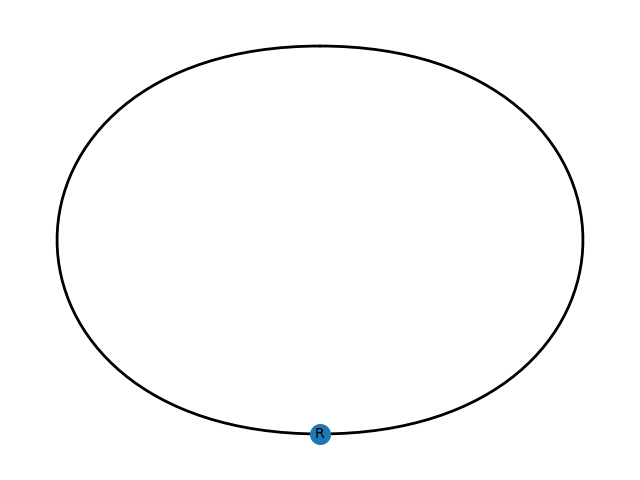

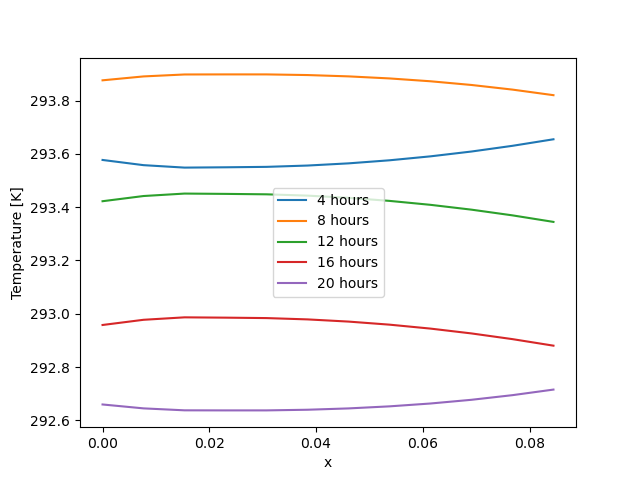

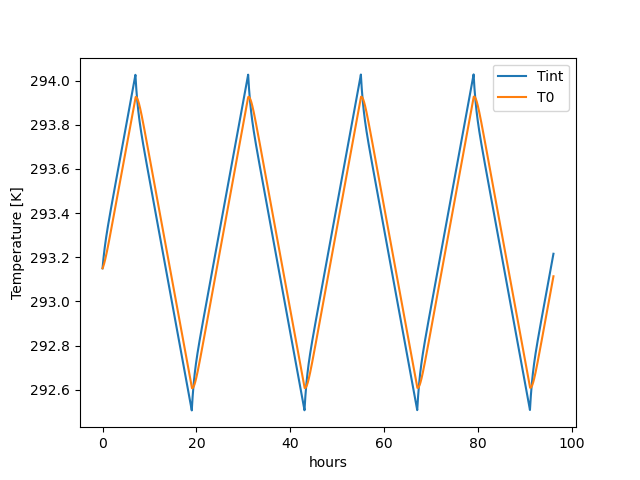

In [31]:
bG = bg.BuildingGraph(connectivityMatrix, roomList)
bG.updateEdges({"wall_kwargs" :wall_kwargs})
bG.updateNodes({
    "room_kwargs": room_kwargs,
    "vent_kwargs": vent_kwargs,
        "rad_kwargs": {"solveType": None},
    })
bG.draw()

build_sim = bs.BuildingSimulation(**sim_kwargs)
build_sim.initialize(bG)

build_sim.run()

Tints = build_sim.bG.G.nodes['R']['Tints']
T_profs = build_sim.bG.G.edges['R', 'R']['T_profs']
wall = build_sim.bG.G.edges['R', 'R']['wall']
h_profs = [4, 8, 12, 16, 20]
h_profs = [h + 48 for h in h_profs]
# h_profs = [0, *h_profs]

# Plotting
plt.figure()
plt.plot(build_sim.hours, Tints, label='Tint')
plt.plot(build_sim.hours, T_profs[0, :], label='T0')
plt.legend()
plt.xlabel('hours')
plt.ylabel('Temperature [K]')

plt.figure()
for h in h_profs:
    i = int(h * 60 * 60 / build_sim.delt)
    plt.plot(wall.x, T_profs[:, i], label=f'{h % 24} hours')

plt.legend()
plt.xlabel('x')
plt.ylabel('Temperature [K]')
plt.show()